- <span style="color:red">(09/10, JK) 아래 셀 실행전에 gluoncv 설치 안내 필요.</span>

In [3]:
!pip install gluoncv

    100% |████████████████████████████████| 512kB 33.4MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 40.9MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import os
import subprocess

from gluoncv import utils
from gluoncv.data import LstDetection

# import numpy as np
from matplotlib import pyplot as plt

from utils import create_lst, write_lst_to_file

<font color='red'>중요</font> 
아래 gt_job_name 변수의 값을 반드시 이전 단계에서 정의한 Ground Truth job name으로 변경해주세요.

In [5]:
base_dir = '.'
im_dir = '{}/lab-images'.format(base_dir)
gt_manifest = '{}/output.manifest'.format(base_dir)

#gt_job_name = 'devday-gluoncv-lab'
gt_job_name = 'devday-gluoncv-lab-2'

testset_ratio = 0.3

In [7]:
lst_list, number_label, number_no_label = create_lst(gt_manifest, gt_job_name)

print('number of frames with label    : {}'.format(number_label))
print('number of frames with no label : {}'.format(number_no_label))

number of frames with label    : 19
number of frames with no label : 0


In [8]:
testset_first_idx = int(len(lst_list) * (1-testset_ratio))

train_lst = lst_list[:testset_first_idx]
test_lst = lst_list[testset_first_idx:]

print('number of train dataset : {}'.format(len(train_lst)))
print('number of test dataset : {}'.format(len(test_lst)))

number of train dataset : 13
number of test dataset : 6


In [9]:
train_lst_fname = '{}/train.lst'.format(base_dir)
test_lst_fname = '{}/test.lst'.format(base_dir)

write_lst_to_file(train_lst, train_lst_fname)
write_lst_to_file(test_lst, test_lst_fname)

In [10]:
lst_dataset = LstDetection(test_lst_fname, root=im_dir)

img_idx = 1

img = lst_dataset[img_idx][0]

bbox=lst_dataset[img_idx][1][0][0:4].astype(int)
bbox = bbox.reshape(1,-1)

ids = lst_dataset[img_idx][1][0][4].astype(int)
ids = ids.reshape(1,-1)

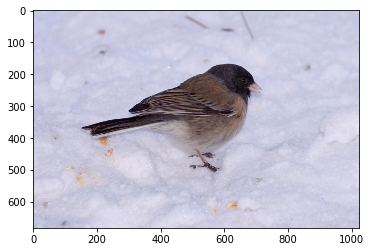

In [11]:
ax = utils.viz.plot_image(img)
plt.show()

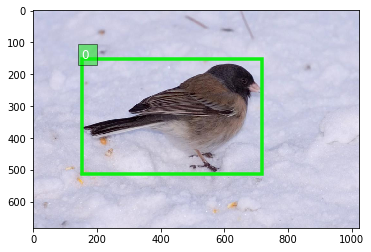

In [12]:
ax = utils.viz.plot_bbox(img, bbox, labels=ids) #,labels=all_ids, class_names=class_names)

In [13]:
datasets = ['train', 'test']

for dataset in datasets:
    cmd = 'python im2rec.py {}.lst {} --no-shuffle --pass-through --pack-label'.format(dataset, im_dir)
    print(cmd)
    os.system(cmd)

python im2rec.py train.lst ./lab-images --no-shuffle --pass-through --pack-label
python im2rec.py test.lst ./lab-images --no-shuffle --pass-through --pack-label


In [14]:
!ls -al *.rec

-rw-rw-r-- 1 ec2-user ec2-user 1111040 Sep 10 10:32 test.rec
-rw-rw-r-- 1 ec2-user ec2-user 4848936 Sep 10 10:32 train.rec
